<a href="https://colab.research.google.com/github/suinkangme/COMP432-GroupI/blob/main/Task2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN On ImageNet Dataset 2

In [1]:
#Import pandas for csv, numpy for math, matplot for graph and sklearn for KNN Classifier, data splitting and cross validation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
#Import the csv file containing the 6000 samples of [512,1] feature sets output by the CNN
!gdown 1L5mB-u4-rZIt-CRVLEXPr6Li6W0d21ww
!gdown 1SAkn3JoiVPNxvOQZ97BznVSEcu1fmHDy

Downloading...
From: https://drive.google.com/uc?id=1L5mB-u4-rZIt-CRVLEXPr6Li6W0d21ww
To: /content/Dataset2_imagenet.csv
100% 32.0M/32.0M [00:01<00:00, 26.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SAkn3JoiVPNxvOQZ97BznVSEcu1fmHDy
To: /content/Dataset3_imagenet.csv
100% 31.9M/31.9M [00:00<00:00, 56.3MB/s]


In [3]:
#Read the datasets into a pandas dataframe
dataset2 = pd.read_csv("/content/Dataset2_imagenet.csv")
dataset3 = pd.read_csv("/content/Dataset3_imagenet.csv")

In [4]:
#Convert the dataframe to numpy arrays of features and labels
dataset2_labels = dataset2['label'].to_numpy()
dataset2_features = dataset2[dataset2.columns[:-1]].to_numpy()
#Split the data into train and test with 80:20 split
dataset2_train_features, dataset2_test_features, dataset2_train_labels, dataset2_test_labels = train_test_split(dataset2_features,dataset2_labels, test_size=0.2, random_state=0)
print("Dataset 2 Features: " + str(dataset2_features.shape))
print("Dataset 2 Labels: "+ str(dataset2_labels.shape))
print("Dataset 2 with a 80:20 split")
print("Dataset 2 Train Features: " + str(dataset2_train_features.shape))
print("Dataset 2 Train Labels: "+ str(dataset2_train_labels.shape))
print("Dataset 2 Test Features: " + str(dataset2_test_features.shape))
print("Dataset 2 Test Labels: "+ str(dataset2_test_labels.shape))

Dataset 2 Features: (6000, 512)
Dataset 2 Labels: (6000,)
Dataset 2 with a 80:20 split
Dataset 2 Train Features: (4800, 512)
Dataset 2 Train Labels: (4800,)
Dataset 2 Test Features: (1200, 512)
Dataset 2 Test Labels: (1200,)


In [5]:
#Function to plot accuracy of test set on training data for values of k from (1,50)
def kGraph(Xtrain,ytrain,Xtest,ytest):
  scores = []
  values = range(1,50)
  for k in values:
    KNN = KNeighborsClassifier(n_neighbors=k).fit(Xtrain,ytrain)
    score = KNN.score(Xtest,ytest)
    scores.append(score)
  print("Max accuracy of " + str(max(scores)) + " at k=" + str(scores.index(max(scores)) + 1))
  plt.figure()
  plt.plot(values,scores)

In [6]:
#GridSearch to find optimal parameters for KNN based on k value, weights metric, distance metric/ p value for minkowski, and leafsize for algorithm
estimator = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': list(range(1,41)),
    'p': (1,2),
    'leaf_size': list(range(20,41)),
    'metric': ('minkowski','cosine'),
}

grid_search_KNN = GridSearchCV(
    estimator=estimator,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

#Fit gridsearch to data
grid_search_KNN.fit(dataset2_train_features,dataset2_train_labels)

#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ )
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )

{'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 5, 'p': 1}
Best Score - KNN: 0.9535416666666666


Max accuracy of 0.9408333333333333 at k=23
Max accuracy of 0.9625 at k=9
Max accuracy of 0.965 at k=3
Max accuracy of 0.9616666666666667 at k=9
Max accuracy of 0.9483333333333334 at k=24


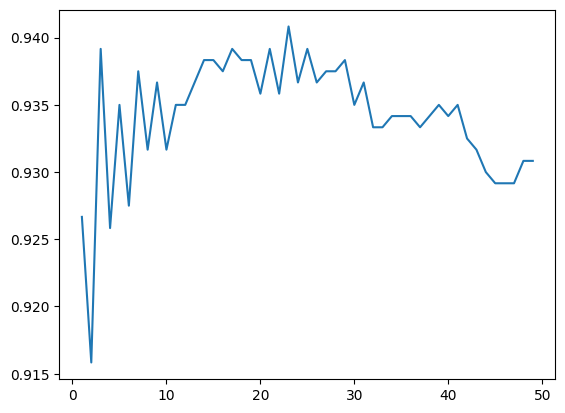

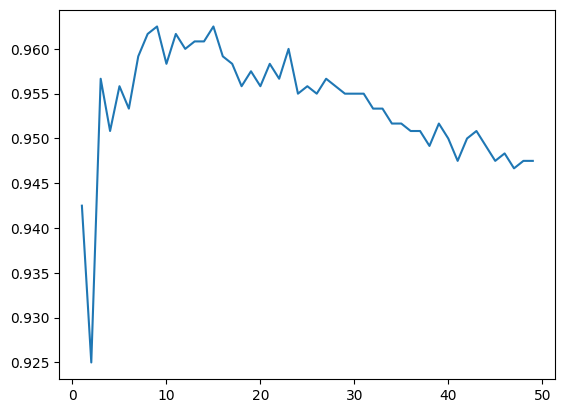

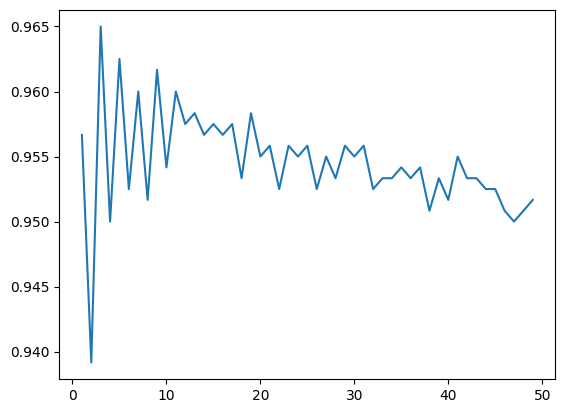

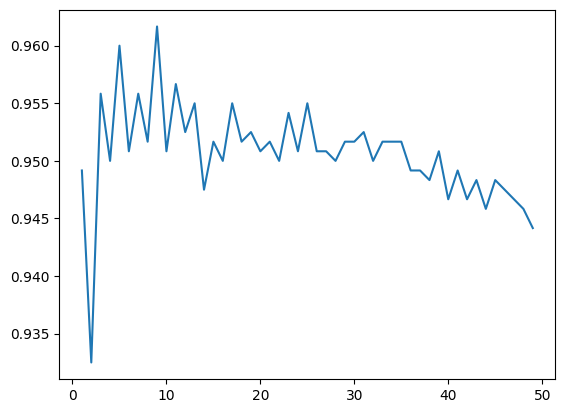

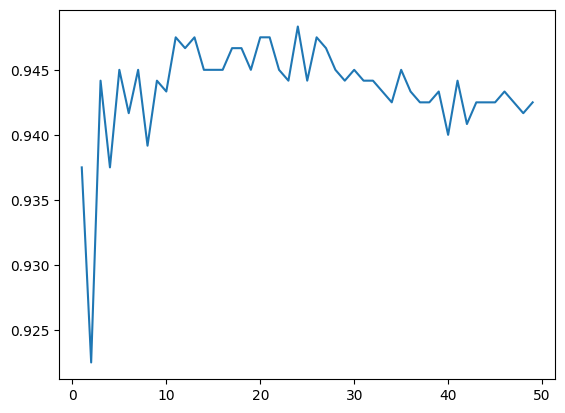

In [7]:
#Over shuffled train/test sets
for x in range(5):
  dataset2_train_features, dataset2_test_features, dataset2_train_labels, dataset2_test_labels = train_test_split(dataset2_features,dataset2_labels, test_size=0.2)
  kGraph(dataset2_train_features,dataset2_train_labels,dataset2_test_features,dataset2_test_labels)



In [8]:
#Dataset 2 KNN with leafsize 20, Euclidian distance and k = 5 for 80:20 train test split with random_state=0
dataset2KNN = KNeighborsClassifier(n_neighbors=5).fit(dataset2_train_features,dataset2_train_labels)
score = dataset2KNN.score(dataset2_test_features,dataset2_test_labels)
print(score)
print("KNN classification report: ")
print(classification_report(dataset2_test_labels,dataset2KNN.predict(dataset2_test_features)))

0.945
KNN classification report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       386
           1       0.96      0.93      0.95       411
           2       0.99      0.95      0.97       403

    accuracy                           0.94      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.94      0.95      1200



In [ ]:
#Same procedure for ImageNet CNN Dataset 3
dataset3_labels = dataset3['label'].to_numpy()
dataset3_features = dataset3[dataset3.columns[:-1]].to_numpy()
dataset3_train_features, dataset3_test_features, dataset3_train_labels, dataset3_test_labels = train_test_split(dataset3_features,dataset3_labels, test_size=0.2, random_state=0)
#GridSearch to find optimal Knn
estimator = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': list(range(1,41)),
    'p': (1,2),
    'leaf_size': list(range(20,41)),
    'metric': ('minkowski','cosine'),
}

grid_search_KNN = GridSearchCV(
    estimator=estimator,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)


grid_search_KNN.fit(dataset3_train_features,dataset3_train_labels)

#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ )
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )
for x in range(5):
  dataset3_train_features, dataset3_test_features, dataset3_train_labels, dataset3_test_labels = train_test_split(dataset3_features,dataset3_labels, test_size=0.2)
  kGraph(dataset3_train_features,dataset3_train_labels,dataset3_test_features,dataset3_test_labels)
dataset3KNN = KNeighborsClassifier(n_neighbors=36).fit(dataset3_train_features,dataset3_train_labels)
score = dataset3KNN.score(dataset3_test_features,dataset3_test_labels)
print(score)